In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv
/kaggle/input/unsw-nb15/UNSW-NB15_1.csv
/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv
/kaggle/input/unsw-nb15/UNSW-NB15_LIST_EVENTS.csv
/kaggle/input/unsw-nb15/UNSW-NB15_4.csv
/kaggle/input/unsw-nb15/UNSW-NB15_3.csv
/kaggle/input/unsw-nb15/UNSW-NB15_2.csv
/kaggle/input/unsw-nb15/NUSW-NB15_features.csv


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [4]:
tf.__version__

'2.16.1'

In [5]:
dfs = []
for i in range(1,5):
    path = '/kaggle/input/unsw-nb15/UNSW-NB15_{}.csv'  # There are 4 input csv files
    dfs.append(pd.read_csv(path.format(i), header = None))
combined_data = pd.concat(dfs).reset_index(drop=True)
combined_data.head()

/tmp/ipykernel_30/3153708562.py:4: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(path.format(i), header = None))
/tmp/ipykernel_30/3153708562.py:4: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(path.format(i), header = None))


,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [6]:
dataset_columns = pd.read_csv('/kaggle/input/unsw-nb15/NUSW-NB15_features.csv',encoding='ISO-8859-1')
dataset_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   No.          49 non-null     int64 
 1   Name         49 non-null     object
 2   Type         49 non-null     object
 3   Description  49 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


In [7]:
combined_data.columns = dataset_columns['Name']
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit          

In [8]:
combined_data.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


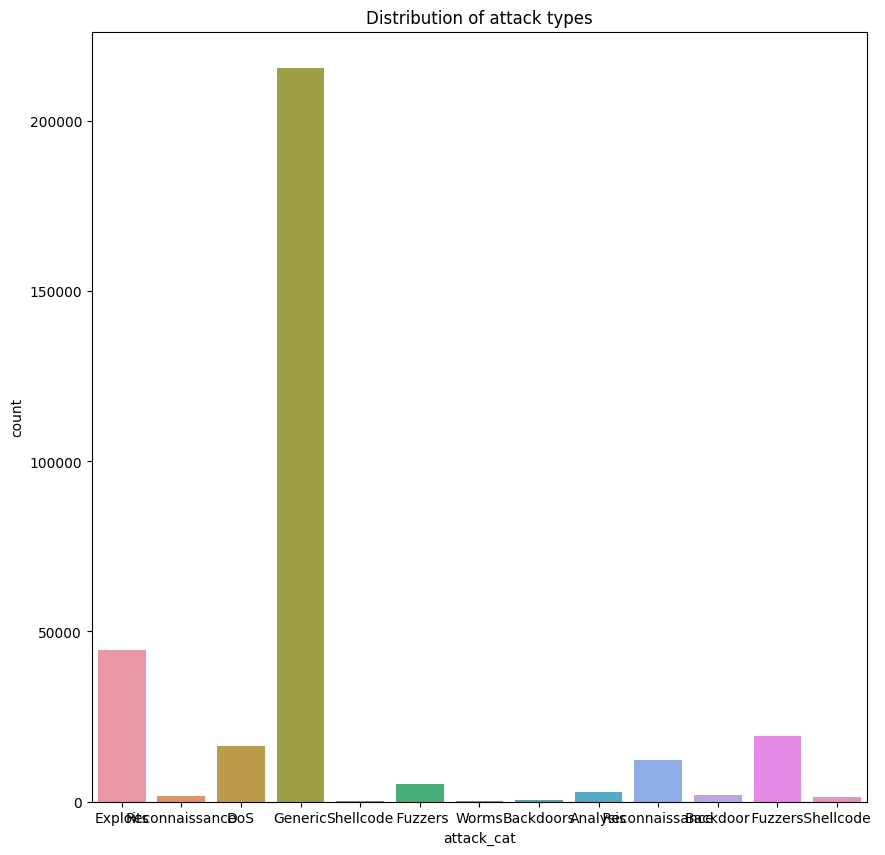

attack_cat
Generic             0.670689
Exploits            0.138585
 Fuzzers            0.059745
DoS                 0.050899
 Reconnaissance     0.038060
 Fuzzers            0.015721
Analysis            0.008332
Backdoor            0.005587
Reconnaissance      0.005475
 Shellcode          0.004009
Backdoors           0.001662
Shellcode           0.000694
Worms               0.000542
Name: proportion, dtype: float64


In [9]:
plt.figure(figsize=(10, 10))
sns.countplot(x='attack_cat', data=combined_data)
plt.title('Distribution of attack types')
plt.show()

# Display normalized value counts
print(combined_data['attack_cat'].value_counts(normalize=True))

In [10]:
combined_data['Label'].value_counts()
combined_data['attack_cat'].isnull().sum()
combined_data['attack_cat'] = combined_data['attack_cat'].fillna(value='normal').apply(lambda x: x.strip().lower())
combined_data['attack_cat'].value_counts()

attack_cat
normal            2218764
generic            215481
exploits            44525
fuzzers             24246
dos                 16353
reconnaissance      13987
analysis             2677
backdoor             1795
shellcode            1511
backdoors             534
worms                 174
Name: count, dtype: int64

In [11]:
combined_data['attack_cat'] = combined_data['attack_cat'].replace('backdoors','backdoor', regex=True).apply(lambda x: x.strip().lower())
combined_data['attack_cat'].value_counts()

attack_cat
normal            2218764
generic            215481
exploits            44525
fuzzers             24246
dos                 16353
reconnaissance      13987
analysis             2677
backdoor             2329
shellcode            1511
worms                 174
Name: count, dtype: int64

In [12]:
combined_data['ct_flw_http_mthd'] = combined_data['ct_flw_http_mthd'].fillna(value=0)
combined_data['is_ftp_login'].value_counts()

is_ftp_login
0.0    1066593
1.0      43389
4.0        156
2.0         30
Name: count, dtype: int64

In [13]:
combined_data['is_ftp_login'] = combined_data['is_ftp_login'].fillna(value=0)
combined_data['is_ftp_login'].value_counts()

is_ftp_login
0.0    2496472
1.0      43389
4.0        156
2.0         30
Name: count, dtype: int64

In [14]:
combined_data['is_ftp_login'] = np.where(combined_data['is_ftp_login']>1, 1, combined_data['is_ftp_login'])
combined_data['is_ftp_login'].value_counts()

is_ftp_login
0.0    2496472
1.0      43575
Name: count, dtype: int64

In [15]:
combined_data['service'].value_counts()

service
-           1246397
dns          781668
http         206273
ftp-data     125783
smtp          81645
ftp           49090
ssh           47160
pop3           1533
dhcp            172
ssl             142
snmp            113
radius           40
irc              31
Name: count, dtype: int64

In [16]:
combined_data['service'] = combined_data['service'].apply(lambda x:"None" if x=='-' else x)
combined_data['service'].value_counts()

service
None        1246397
dns          781668
http         206273
ftp-data     125783
smtp          81645
ftp           49090
ssh           47160
pop3           1533
dhcp            172
ssl             142
snmp            113
radius           40
irc              31
Name: count, dtype: int64

In [17]:
combined_data['ct_ftp_cmd'].unique()
combined_data['ct_ftp_cmd'] = combined_data['ct_ftp_cmd'].replace(to_replace=' ', value=0).astype(int)
combined_data['ct_ftp_cmd'].unique()
combined_data[['service','ct_flw_http_mthd','is_ftp_login','ct_ftp_cmd','attack_cat','Label']]

Name,service,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,attack_cat,Label
0,dns,0.0,0.0,0,normal,0
1,None,0.0,0.0,0,normal,0
2,dns,0.0,0.0,0,normal,0
3,dns,0.0,0.0,0,normal,0
4,dns,0.0,0.0,0,normal,0
...,...,...,...,...,...,...
2540042,ftp-data,0.0,0.0,0,normal,0
2540043,ftp,0.0,1.0,2,normal,0
2540044,ftp,0.0,1.0,2,normal,0
2540045,http,2.0,0.0,0,normal,0


In [18]:
combined_data['attack_cat'].nunique()

10

In [19]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit          

In [20]:
combined_data.drop(columns=['srcip','sport','dstip','dsport','Label'],inplace=True)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 44 columns):
 #   Column            Dtype  
---  ------            -----  
 0   proto             object 
 1   state             object 
 2   dur               float64
 3   sbytes            int64  
 4   dbytes            int64  
 5   sttl              int64  
 6   dttl              int64  
 7   sloss             int64  
 8   dloss             int64  
 9   service           object 
 10  Sload             float64
 11  Dload             float64
 12  Spkts             int64  
 13  Dpkts             int64  
 14  swin              int64  
 15  dwin              int64  
 16  stcpb             int64  
 17  dtcpb             int64  
 18  smeansz           int64  
 19  dmeansz           int64  
 20  trans_depth       int64  
 21  res_bdy_len       int64  
 22  Sjit              float64
 23  Djit              float64
 24  Stime             int64  
 25  Ltime             int64  
 26  Sintpkt       

In [21]:
train, test = train_test_split(combined_data,test_size=0.2,random_state=16)
train, val = train_test_split(train,test_size=0.2,random_state=16)
train.shape

(1625629, 44)

In [22]:
test.shape

(508010, 44)

In [23]:
x_train, y_train = train.drop(columns=['attack_cat']), train[['attack_cat']]
x_test, y_test = test.drop(columns=['attack_cat']), test[['attack_cat']]
x_val, y_val = val.drop(columns=['attack_cat']), val[['attack_cat']]
x_train.shape, y_train.shape

((1625629, 43), (1625629, 1))

In [24]:
x_test.shape, y_test.shape

((508010, 43), (508010, 1))

In [25]:
x_val.shape, y_val.shape

((406408, 43), (406408, 1))

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1625629 entries, 1070804 to 2148776
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   proto             1625629 non-null  object 
 1   state             1625629 non-null  object 
 2   dur               1625629 non-null  float64
 3   sbytes            1625629 non-null  int64  
 4   dbytes            1625629 non-null  int64  
 5   sttl              1625629 non-null  int64  
 6   dttl              1625629 non-null  int64  
 7   sloss             1625629 non-null  int64  
 8   dloss             1625629 non-null  int64  
 9   service           1625629 non-null  object 
 10  Sload             1625629 non-null  float64
 11  Dload             1625629 non-null  float64
 12  Spkts             1625629 non-null  int64  
 13  Dpkts             1625629 non-null  int64  
 14  swin              1625629 non-null  int64  
 15  dwin              1625629 non-null  int64  
 16 

In [27]:
cat_col = ['proto', 'service', 'state']
num_col = list(set(x_train.columns) - set(cat_col))

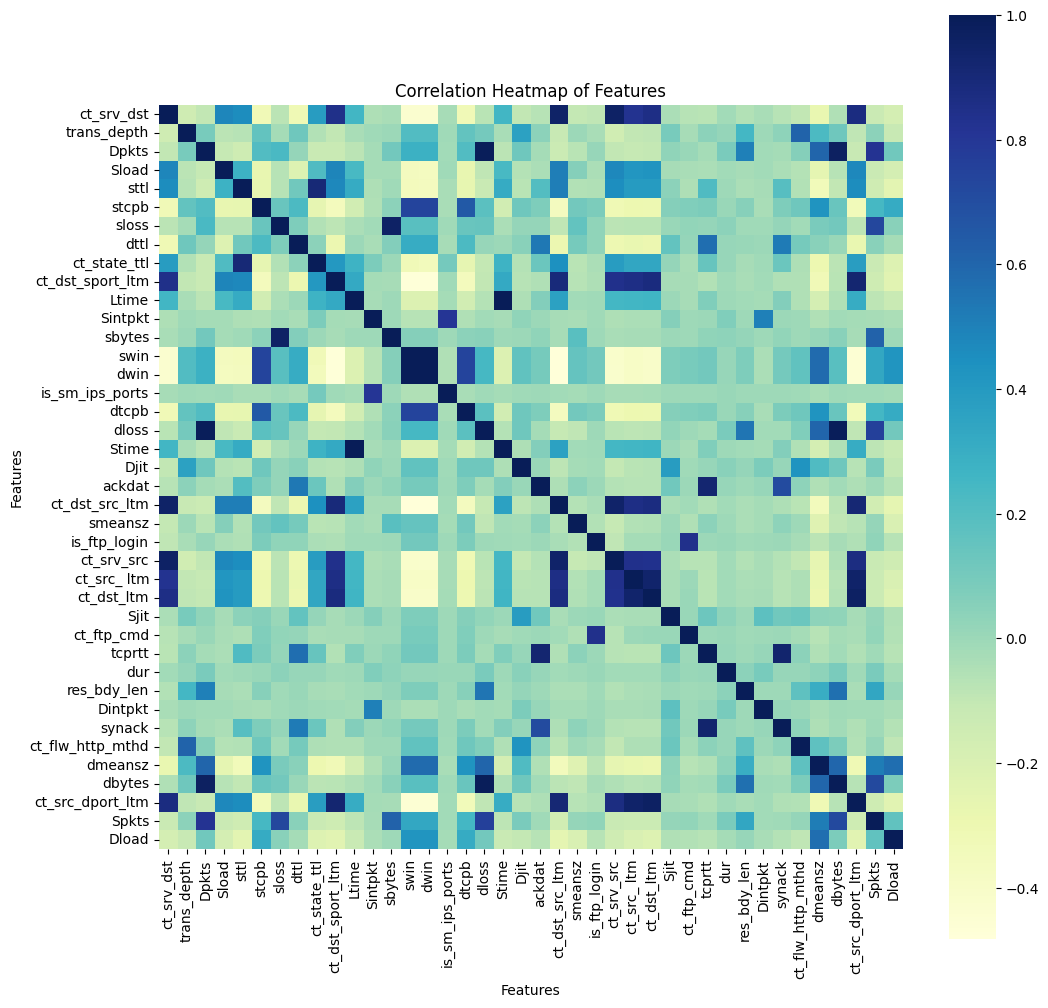

In [28]:
correlation_matrix = train[num_col].corr()
plt.figure(figsize=(12, 12))  
sns.heatmap(correlation_matrix, cmap='YlGnBu', square=True)
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap of Features')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
#figure=svm.get_figure()
#figure.savefig('svm_heatmap.png',dpi=400)


In [29]:
train

Name,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat
1070804,tcp,FIN,0.438857,4776,3080,31,29,7,7,None,...,0.0,0,6,3,4,5,1,1,3,normal
1054569,tcp,CON,0.026163,2230,13900,31,29,7,10,None,...,0.0,0,2,7,2,1,1,1,1,normal
1548299,tcp,FIN,0.014954,2854,26584,31,29,7,16,None,...,0.0,0,9,6,4,8,1,1,1,normal
2305760,udp,INT,0.000009,114,0,254,0,0,0,dns,...,0.0,0,33,33,17,17,17,17,33,generic
1989356,udp,CON,0.001562,544,304,31,29,0,0,None,...,0.0,0,6,7,5,6,1,1,3,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358801,tcp,FIN,0.046476,320,1890,31,29,1,2,ftp-data,...,0.0,0,3,5,3,7,1,1,2,normal
556159,tcp,FIN,0.027755,5928,8010,31,29,14,17,ssh,...,0.0,0,1,1,8,3,1,1,1,normal
1408939,udp,INT,0.000003,264,0,60,0,0,0,dns,...,0.0,0,39,39,18,18,18,18,39,normal
1894282,tcp,FIN,0.057911,2766,27392,31,29,7,16,None,...,0.0,0,2,2,3,4,1,1,1,normal


In [30]:
del combined_data

In [31]:
train

Name,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat
1070804,tcp,FIN,0.438857,4776,3080,31,29,7,7,None,...,0.0,0,6,3,4,5,1,1,3,normal
1054569,tcp,CON,0.026163,2230,13900,31,29,7,10,None,...,0.0,0,2,7,2,1,1,1,1,normal
1548299,tcp,FIN,0.014954,2854,26584,31,29,7,16,None,...,0.0,0,9,6,4,8,1,1,1,normal
2305760,udp,INT,0.000009,114,0,254,0,0,0,dns,...,0.0,0,33,33,17,17,17,17,33,generic
1989356,udp,CON,0.001562,544,304,31,29,0,0,None,...,0.0,0,6,7,5,6,1,1,3,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358801,tcp,FIN,0.046476,320,1890,31,29,1,2,ftp-data,...,0.0,0,3,5,3,7,1,1,2,normal
556159,tcp,FIN,0.027755,5928,8010,31,29,14,17,ssh,...,0.0,0,1,1,8,3,1,1,1,normal
1408939,udp,INT,0.000003,264,0,60,0,0,0,dns,...,0.0,0,39,39,18,18,18,18,39,normal
1894282,tcp,FIN,0.057911,2766,27392,31,29,7,16,None,...,0.0,0,2,2,3,4,1,1,1,normal


In [32]:
test

Name,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat
752174,udp,CON,0.001037,146,178,31,29,0,0,dns,...,0.0,0,2,2,2,3,1,1,1,normal
328310,udp,CON,0.001008,146,178,31,29,0,0,dns,...,0.0,0,5,2,6,3,1,1,1,normal
1429547,udp,INT,0.000009,264,0,60,0,0,0,dns,...,0.0,0,31,31,25,25,25,25,31,normal
528257,tcp,FIN,0.005121,3920,2456,31,29,7,7,None,...,0.0,0,7,9,6,6,1,1,4,normal
1810467,udp,CON,0.001134,146,178,31,29,0,0,dns,...,0.0,0,3,3,1,2,1,1,2,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327636,tcp,FIN,0.029930,2230,15258,31,29,7,11,None,...,0.0,0,10,9,2,2,1,1,1,normal
1340646,udp,CON,0.001049,130,162,31,29,0,0,dns,...,0.0,0,2,3,7,3,1,1,3,normal
863090,udp,CON,0.001710,536,304,31,29,0,0,None,...,0.0,0,13,21,4,5,1,1,4,normal
1890181,udp,CON,0.001097,146,178,31,29,0,0,dns,...,0.0,0,1,1,2,3,1,1,1,normal


In [33]:
x_train.isnull().sum()

Name
proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
Sload               0
Dload               0
Spkts               0
Dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smeansz             0
dmeansz             0
trans_depth         0
res_bdy_len         0
Sjit                0
Djit                0
Stime               0
Ltime               0
Sintpkt             0
Dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_flw_http_mthd    0
is_ftp_login        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ ltm         0
ct_src_dport_ltm    0
ct_dst_sport_ltm    0
ct_dst_src_ltm      0
dtype: int64

In [34]:
del train
del test

In [35]:
scaler = StandardScaler()
scaler = scaler.fit(x_train[num_col])
x_train[num_col] = scaler.transform(x_train[num_col])
x_test[num_col] = scaler.transform(x_test[num_col])
x_val[num_col] = scaler.transform(x_val[num_col])

In [36]:
x_train.isnull().sum()

Name
proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
Sload               0
Dload               0
Spkts               0
Dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smeansz             0
dmeansz             0
trans_depth         0
res_bdy_len         0
Sjit                0
Djit                0
Stime               0
Ltime               0
Sintpkt             0
Dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_flw_http_mthd    0
is_ftp_login        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ ltm         0
ct_src_dport_ltm    0
ct_dst_sport_ltm    0
ct_dst_src_ltm      0
dtype: int64

In [37]:
x_train.head(10)

Name,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
1070804,tcp,FIN,-0.015666,0.006680,-0.207565,-0.425819,-0.041571,0.078012,-0.165407,None,...,-0.197064,-0.132412,-0.111932,-0.295572,-0.552931,-0.298713,-0.231552,-0.429343,-0.419600,-0.341354
1054569,tcp,CON,-0.044727,-0.036739,-0.140409,-0.425819,-0.041571,0.078012,-0.112384,None,...,-0.197064,-0.132412,-0.111932,-0.664805,-0.183215,-0.543699,-0.718943,-0.429343,-0.419600,-0.519068
1548299,tcp,FIN,-0.045516,-0.026097,-0.061684,-0.425819,-0.041571,0.078012,-0.006337,None,...,-0.197064,-0.132412,-0.111932,-0.018647,-0.275644,-0.298713,0.133992,-0.429343,-0.419600,-0.519068
2305760,udp,INT,-0.046569,-0.072824,-0.226682,2.562744,-0.717922,-0.222087,-0.289129,dns,...,-0.197064,-0.132412,-0.111932,2.196755,2.219942,1.293699,1.230624,1.457340,2.172686,2.324369
1989356,udp,CON,-0.046459,-0.065491,-0.224795,-0.425819,-0.041571,-0.222087,-0.289129,None,...,-0.197064,-0.132412,-0.111932,-0.295572,-0.183215,-0.176220,-0.109704,-0.429343,-0.419600,-0.341354
856594,udp,CON,-0.046495,-0.072279,-0.225577,-0.425819,-0.041571,-0.222087,-0.289129,dns,...,-0.197064,-0.132412,-0.111932,-0.572497,-0.552931,-0.543699,-0.353400,-0.311426,-0.419600,-0.519068
2405867,udp,INT,-0.046569,-0.070266,-0.226682,-0.037172,-0.717922,-0.222087,-0.289129,dns,...,-0.197064,-0.132412,-0.111932,2.104447,2.127513,0.926220,0.865080,1.103587,1.686632,2.235512
1720007,udp,INT,-0.046569,-0.072824,-0.226682,2.562744,-0.717922,-0.222087,-0.289129,dns,...,-0.197064,-0.132412,-0.111932,3.027531,3.051804,1.416193,1.352472,1.575258,2.334703,3.124086
2226610,udp,INT,-0.046569,-0.072824,-0.226682,2.562744,-0.717922,-0.222087,-0.289129,dns,...,-0.197064,-0.132412,-0.111932,0.535204,0.556218,1.048713,0.986928,1.221505,1.848650,0.724936
1234375,udp,INT,-0.046569,-0.070266,-0.226682,-0.037172,-0.717922,-0.222087,-0.289129,dns,...,-0.197064,-0.132412,-0.111932,-0.480189,-0.460502,-0.298713,-0.353400,-0.075590,0.066454,-0.252496


In [38]:
x_train.shape

(1625629, 43)

In [39]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), cat_col)], remainder='passthrough')
x_train = np.array(ct.fit_transform(x_train))
x_test = np.array(ct.transform(x_test))
x_val = np.array(ct.transform(x_val))

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [40]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1625629 entries, 1070804 to 2148776
Data columns (total 1 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   attack_cat  1625629 non-null  object
dtypes: object(1)
memory usage: 24.8+ MB


In [41]:
y_train.columns

Index(['attack_cat'], dtype='object', name='Name')

In [42]:
attacks = y_train['attack_cat'].unique()
attacks

array(['normal', 'generic', 'fuzzers', 'exploits', 'dos',
       'reconnaissance', 'backdoor', 'analysis', 'shellcode', 'worms'],
      dtype=object)

In [43]:
unique_values, counts = np.unique(y_train, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: analysis, Count: 1716
Value: backdoor, Count: 1499
Value: dos, Count: 10454
Value: exploits, Count: 28640
Value: fuzzers, Count: 15494
Value: generic, Count: 137574
Value: normal, Count: 1420187
Value: reconnaissance, Count: 8985
Value: shellcode, Count: 979
Value: worms, Count: 101


In [44]:
unique_values, counts = np.unique(y_test, return_counts=True)


for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: analysis, Count: 544
Value: backdoor, Count: 470
Value: dos, Count: 3288
Value: exploits, Count: 8709
Value: fuzzers, Count: 4928
Value: generic, Count: 43187
Value: normal, Count: 443714
Value: reconnaissance, Count: 2813
Value: shellcode, Count: 320
Value: worms, Count: 37


In [45]:
unique_values, counts = np.unique(y_test, return_counts=True)


for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: analysis, Count: 544
Value: backdoor, Count: 470
Value: dos, Count: 3288
Value: exploits, Count: 8709
Value: fuzzers, Count: 4928
Value: generic, Count: 43187
Value: normal, Count: 443714
Value: reconnaissance, Count: 2813
Value: shellcode, Count: 320
Value: worms, Count: 37


In [46]:
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(categories=[attacks],sparse=False), ['attack_cat'])], remainder='passthrough')
y_train = np.array(ct1.fit_transform(y_train))
y_test = np.array(ct1.transform(y_test))
y_val = np.array(ct1.transform(y_val))

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [47]:
print(x_train)

[[ 0.          0.          0.         ... -0.42934342 -0.41959965
  -0.34135356]
 [ 0.          0.          0.         ... -0.42934342 -0.41959965
  -0.51906841]
 [ 0.          0.          0.         ... -0.42934342 -0.41959965
  -0.51906841]
 ...
 [ 0.          0.          0.         ...  1.5752582   2.33470341
   2.85751364]
 [ 0.          0.          0.         ... -0.42934342 -0.41959965
  -0.51906841]
 [ 0.          0.          0.         ... -0.31142568 -0.25758182
  -0.43021098]]


In [48]:
print(x_test)

[[ 0.          0.          0.         ... -0.42934342 -0.41959965
  -0.51906841]
 [ 0.          0.          0.         ... -0.42934342 -0.41959965
  -0.51906841]
 [ 0.          0.          0.         ...  2.4006824   3.4688282
   2.14665427]
 ...
 [ 0.          0.          0.         ... -0.42934342 -0.41959965
  -0.25249614]
 [ 0.          0.          0.         ... -0.42934342 -0.41959965
  -0.51906841]
 [ 0.          0.          0.         ...  1.45734046  2.17268558
   0.90265035]]


In [49]:
y_train.shape

(1625629, 10)

In [50]:
x_train.shape

(1625629, 204)

In [51]:
x_test.shape

(508010, 204)

In [52]:
x_train.reshape(-1,1).shape

(331628316, 1)

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, LSTM, Dense, Dropout

In [54]:
# Define model parameters
n_features = x_train.shape[1]  # Number of features from training data

# Define the model
model = Sequential()

# First convolutional block
model.add(Conv1D(filters=16, kernel_size=1, activation='relu', input_shape=(n_features,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

# First LSTM block
model.add(LSTM(units=16, return_sequences=True))
#model.add(Dropout(0.2))  # Added dropout after LSTM

# Second convolutional block
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

# Second LSTM block
model.add(LSTM(units=32, return_sequences=True))
#model.add(Dropout(0.2))  # Added dropout after LSTM# Third convolutional block
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

# Third LSTM block
model.add(LSTM(units=64))
#model.add(Dropout(0.2))  # Added dropout after LSTM

# Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Adjusted dropout rate for dense layer

model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 204, 16)        │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 102, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 102, 16)        │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 102, 16)        │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 100, 32)        │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 50, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 46, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 23, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 23, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,618 (236.79 KB)

 Trainable params: 60,394 (235.91 KB)

 Non-trainable params: 224 (896.00 B)

In [55]:
def create_model():
    n_features = x_train.shape[1]  # Number of features from training data

    # Define the model
    model = Sequential()

    # First convolutional block
    model.add(Conv1D(filters=16, kernel_size=1, activation='relu', input_shape=(n_features,1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(BatchNormalization())

    # First LSTM block
    model.add(LSTM(units=16, return_sequences=True))
    #model.add(Dropout(0.2))  # Added dropout after LSTM

    # Second convolutional block
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(BatchNormalization())

    # Second LSTM block
    model.add(LSTM(units=32, return_sequences=True))
      # Third convolutional block
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(BatchNormalization())

    # Third LSTM block
    model.add(LSTM(units=64))
    #model.add(Dropout(0.2))  # Added dropout after LSTM

    # Dense layers
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))  # Adjusted dropout rate for dense layer

    model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    
    return model
    

In [56]:
x_train.shape

(1625629, 204)

In [57]:
history = model.fit(x_train, y_train, epochs=2, batch_size=512,validation_data=(x_val,y_val))

 #Evaluate the model
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

Epoch 1/2
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 828s 258ms/step - accuracy: 0.9645 - loss: 0.1145 - precision: 0.9866 - recall: 0.9425 - val_accuracy: 0.9617 - val_loss: 0.1531 - val_precision: 0.9739 - val_recall: 0.9566
Epoch 2/2
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 860s 257ms/step - accuracy: 0.9752 - loss: 0.0627 - precision: 0.9893 - recall: 0.9652 - val_accuracy: 0.9765 - val_loss: 0.0578 - val_precision: 0.9895 - val_recall: 0.9674
15876/15876 ━━━━━━━━━━━━━━━━━━━━ 301s 19ms/step - accuracy: 0.9763 - loss: 0.0584 - precision: 0.9893 - recall: 0.9672
Test Loss: 0.05790748447179794
Test Accuracy: 0.976494550704956
Test Precision: 0.9893617033958435
Test Recall: 0.9676955342292786


In [58]:
y_pred = model.predict(x_test) 

15876/15876 ━━━━━━━━━━━━━━━━━━━━ 292s 18ms/step


In [59]:
y_pred

array([[9.9999958e-01, 8.8322718e-09, 3.0213236e-08, ..., 6.1421879e-08,
        2.8723969e-11, 4.8682645e-13],
       [9.9999970e-01, 6.6050054e-09, 2.2403977e-08, ..., 3.2965684e-08,
        1.1860420e-11, 1.6871286e-13],
       [9.9999291e-01, 2.8181864e-07, 3.6365902e-06, ..., 2.4698312e-07,
        8.1773738e-10, 3.0399058e-11],
       ...,
       [9.9999994e-01, 2.4232556e-09, 3.2430392e-09, ..., 3.5370107e-09,
        1.1280328e-12, 8.8150134e-15],
       [9.9999857e-01, 1.8056655e-08, 9.5872799e-08, ..., 1.5576317e-07,
        1.5045677e-10, 3.1627914e-12],
       [2.2709094e-06, 9.9998248e-01, 3.5153416e-06, ..., 4.5604032e-09,
        3.2624323e-09, 2.5388776e-08]], dtype=float32)

In [60]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [61]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
y_train_labels = np.argmax(y_train, axis=1)
y_train_labels

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
scores = []
model = create_model()
for train_index, val_index in kfold.split(x_train, y_train_labels):
    X_train_inner, X_val_inner = x_train[train_index], x_train[val_index]
    y_train_inner, y_val_inner = y_train[train_index], y_train[val_index] 
    
    model.fit(X_train_inner, y_train_inner, epochs=2, batch_size=1024,validation_data=(X_val_inner, y_val_inner))
    test_loss, test_acc, precision, recall = model.evaluate(x_val, y_val)
    scores.append([test_loss, test_acc, precision, recall])

print("Average K-Fold Cross-Validation Results (on Validation Set):")
print("Loss:", np.mean([score[0] for score in scores]))
print("Accuracy:", np.mean([score[1] for score in scores]))
print("Precision:", np.mean([score[2] for score in scores]))
print("Recall:", np.mean([score[3] for score in scores]))

Epoch 1/2
794/794 ━━━━━━━━━━━━━━━━━━━━ 476s 590ms/step - accuracy: 0.9376 - loss: 0.2325 - precision_1: 0.9738 - recall_1: 0.8946 - val_accuracy: 0.9730 - val_loss: 0.0724 - val_precision_1: 0.9909 - val_recall_1: 0.9603
Epoch 2/2
794/794 ━━━━━━━━━━━━━━━━━━━━ 455s 574ms/step - accuracy: 0.9732 - loss: 0.0697 - precision_1: 0.9899 - recall_1: 0.9614 - val_accuracy: 0.9746 - val_loss: 0.0638 - val_precision_1: 0.9915 - val_recall_1: 0.9625
12701/12701 ━━━━━━━━━━━━━━━━━━━━ 246s 19ms/step - accuracy: 0.9751 - loss: 0.0627 - precision_1: 0.9916 - recall_1: 0.9632
Epoch 1/2
794/794 ━━━━━━━━━━━━━━━━━━━━ 463s 584ms/step - accuracy: 0.9744 - loss: 0.0647 - precision_1: 0.9895 - recall_1: 0.9633 - val_accuracy: 0.9749 - val_loss: 0.0642 - val_precision_1: 0.9880 - val_recall_1: 0.9663
Epoch 2/2
794/794 ━━━━━━━━━━━━━━━━━━━━ 454s 573ms/step - accuracy: 0.9753 - loss: 0.0622 - precision_1: 0.9890 - recall_1: 0.9653 - val_accuracy: 0.9755 - val_loss: 0.0610 - val_precision_1: 0.9894 - val_recall_1: 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



12701/12701 ━━━━━━━━━━━━━━━━━━━━ 242s 19ms/step - accuracy: 0.9758 - loss: 0.0602 - precision_1: 0.9896 - recall_1: 0.9661
Average K-Fold Cross-Validation Results (on Validation Set):
Loss: 0.061815639957785606
Accuracy: 0.975255161523819
Precision: 0.9905144274234772
Recall: 0.9645467102527618


In [63]:
y_pred = model.predict(x_test)

15876/15876 ━━━━━━━━━━━━━━━━━━━━ 293s 18ms/step


In [64]:
from sklearn.metrics import confusion_matrix

# Assuming y_test is your one-hot encoded ground truth (shape: n_samples x 10)
# Assuming y_pred is your predicted probabilities (shape: n_samples x 10)

# Get the predicted class index (one label per sample) for each sample
y_pred_labels = np.argmax(y_pred, axis=1)  # Argmax along axis=1 gives the index of the maximum value in each row

# Now you can use the confusion matrix with y_test and y_pred_labels
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_labels)  # Convert y_test to labels using argmax
print(cm)

[[441911      6    936    266      0    592      0      0      3      0]
 [    45  42118     65    890      0     66      0      0      3      0]
 [  2302     20   1567    662      0    373      0      0      4      0]
 [   278     43    175   7630      0    579      0      0      4      0]
 [    59     25     82   3024      0     91      0      0      7      0]
 [    48      1     29    485      0   2250      0      0      0      0]
 [     9      0     52    384      0     25      0      0      0      0]
 [   135      0     45    364      0      0      0      0      0      0]
 [    22      5     30     66      0    185      0      0     12      0]
 [     1      2      3     24      0      6      0      0      1      0]]


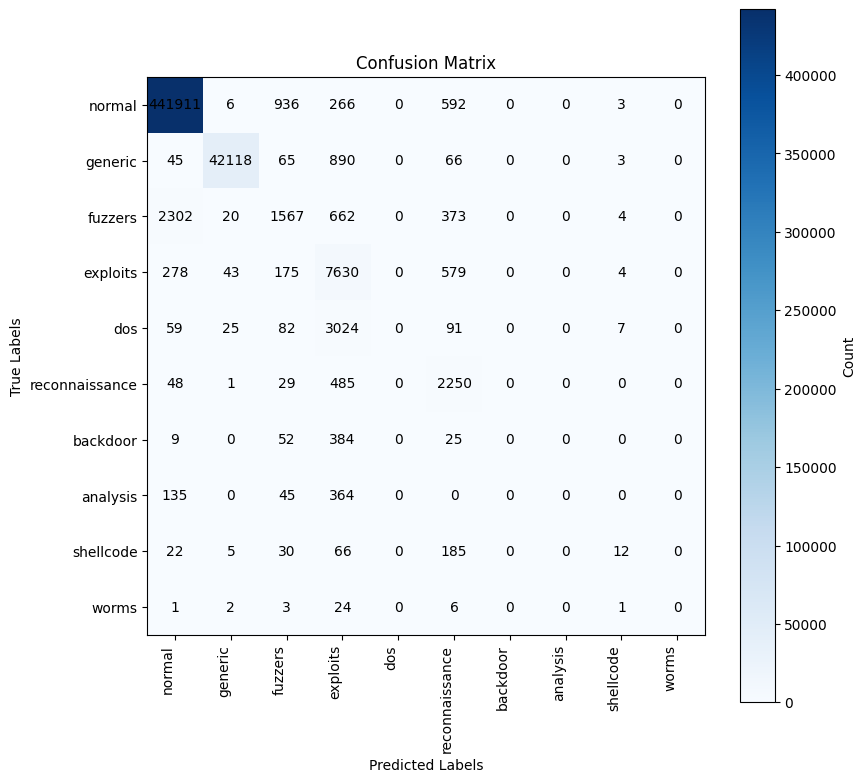

In [65]:
import matplotlib.pyplot as plt

# Define labels for your classes (assuming you know the class names)
class_names = attacks

# Create a heatmap from the confusion matrix
plt.figure(figsize=(9, 9))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.colorbar(label='Count')
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=10)
plt.xticks(range(len(class_names)), class_names, rotation=90, ha='right')
plt.yticks(range(len(class_names)), class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

In [66]:
unique_values, counts = np.unique(y_test, return_counts=True)

# Print the unique values and their corresponding counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0.0, Count: 4572090
Value: 1.0, Count: 508010
